## 1. Introduction to Exploratory Data Analysis

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

In [ ]:
import pandas as pd

## 2. Reading in and Selecting from DataFrames 

Most datasets will be available in one of few formats:
* CSV file (Comma Separated Values): These files mimic an excel spreadsheet, with the different rows on each separate line and the columns separated by commas or semicolons or other symbol on the same line. `pd.read_csv` can be used to read in the file.
* JSON file (Java Script Object Notation): This format consists of object types (key value pairs) in curly braces, and arrays in square braces, and example is as follows: `{type:solvation_data, data:[{SoluteSMILES:"CCC(C)N", SolventSMILES:"CCCCCCC", "DeltaG_Solv":-3.34}, {SoluteSMILES:"CC(CO)O", SolventSMILES:"CC(CO)O", "DeltaG_Solv":-8.58}]}`. `pd.read_json` can be used to read in the file. 

In [ ]:
df = pd.read_csv("solvatum.csv", sep=";")

FileNotFoundError: ignored

To view the first few rows of the dataset, we can print it's head, by calling the `df.head(number_of_rows)` function.

In [ ]:
df.head(10)

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,HYDROGEN SULFIDE,4-FORMYLMORPHOLINE,S,C1COCCN1C=O,-1.81
1,HYDROGEN SULFIDE,ACETIC ACID,S,CC(=O)O,-1.50
2,HYDROGEN SULFIDE,ACETONE,S,CC(=O)C,-1.90
3,HYDROGEN SULFIDE,BROMOBENZENE,S,c1ccc(cc1)Br,-1.30
4,HYDROGEN SULFIDE,CHLOROBENZENE,S,c1ccc(cc1)Cl,-1.50
5,HYDROGEN SULFIDE,DIMETHYLFORMAMIDE,S,CN(C)C=O,-2.20
6,HYDROGEN SULFIDE,ETHYLENE GLYCOL,S,C(CO)O,-0.99
7,HYDROGEN SULFIDE,N-METHYLPYRROLIDONE,S,CN1CCCC1=O,-2.25
8,HYDROGEN SULFIDE,"N,N-DIMETHYLACETAMIDE",S,CC(=O)N(C)C,-2.25
9,HYDROGEN SULFIDE,PHENYLAMINE,S,c1ccc(cc1)N,-1.70


We can extract any subset of rows or columns from the dataset.
* `df[names-of-columns]` is used for selecting columns, where we may provide a single column or an array thereof
* `df.iloc[id-of-rows]` can be used to select some rows in particular when the row-id for those rows is known

In [ ]:
df[['Solute', 'Solvent','DeltaGsolv']] 

,Solute,Solvent,DeltaGsolv
0,HYDROGEN SULFIDE,4-FORMYLMORPHOLINE,-1.81
1,HYDROGEN SULFIDE,ACETIC ACID,-1.50
2,HYDROGEN SULFIDE,ACETONE,-1.90
3,HYDROGEN SULFIDE,BROMOBENZENE,-1.30
4,HYDROGEN SULFIDE,CHLOROBENZENE,-1.50
...,...,...,...
6234,CARBON MONOXIDE,PROPYL ACETATE,0.83
6235,CARBON MONOXIDE,PYRIDINE,1.27
6236,CARBON MONOXIDE,TERT-BUTANOL,0.90
6237,CARBON MONOXIDE,TOLUENE,1.01


In [ ]:
df.iloc[10]

Solute              HYDROGEN SULFIDE
Solvent          PROPYLENE CARBONATE
SoluteSMILES                       S
SolventSMILES           CC1COC(=O)O1
DeltaGsolv                     -1.56
Name: 10, dtype: object

We can always convert a dataframe back to it's array representation, and manipulate it there. But it's idiomatic and efficient to do all dataprocessing in Pandas.

Here we convert the whole dataframe into an array, and then the first 3 rows and the last column which represents the solvation free energies of the first three molecules.

In [ ]:
df.values

In [ ]:
df.values[:3, -1]

**Exercise Questions:**
* Print the element in the 23rd row of the dataset
* Make a list of all the solvation free energy values as a list, and compute it's mean
* Make a dataframe with just the smiles strings of solvents and solutes and the solvation free energies, i.e. remove the common names.

In [ ]:
df.iloc[23]

Solute              SULFUR DIOXIDE
Solvent          DIMETHYLFORMAMIDE
SoluteSMILES                 O=S=O
SolventSMILES             CN(C)C=O
DeltaGsolv                   -3.63
Name: 23, dtype: object

In [ ]:
free_en_list = df['DeltaGsolv']

In [ ]:
free_en_list.mean()

-3.831540310947248

In [ ]:
df_smiles = df[['SoluteSMILES','SolventSMILES','DeltaGsolv']]

## 3. Statistics on DataFrames

For the many numerical quantities that exist in a dataframe, we might want to compute it's mean, median, mode, quartiles, and other statistical measures. Several inbuilt functions in pandas exist for there.

The catch all for any numerical column is called describe, which for each numerical data column prints it's unique values count, mean, standard deviation, and quartiles.

This data is really useful when applied to features or outputs in estimating which features are high variance, which can be relied on significantly, etc. making this type of data analysis key in feature engineering. 

In [ ]:
df.describe()

,DeltaGsolv
count,6239.000000
mean,-3.831540
std,2.278619
min,-25.470000
25%,-4.950000
50%,-3.930000
75%,-2.730000
max,3.430000


In [ ]:
df.mean(numeric_only=True)

DeltaGsolv   -3.83154
dtype: float64

In [ ]:
df.median(numeric_only=True)

DeltaGsolv   -3.93
dtype: float64

In [ ]:
df["DeltaGsolv"].max()

3.43

In [ ]:
df["DeltaGsolv"].min()

**Exercise Question:** Find the solvation free energy value which is higher than that of 80% of the molecules, and lower than 20% of them.

In [ ]:
df['DeltaGsolv'].describe()

count    6239.000000
mean       -3.831540
std         2.278619
min       -25.470000
25%        -4.950000
50%        -3.930000
75%        -2.730000
max         3.430000
Name: DeltaGsolv, dtype: float64

More discussion on this sort of analysis will follow once we learn to use plotting tools to gain more insights.

## 4. Sampling, Grouping and Filtering

To sample some number of rows, or fraction of all the rows from the dataframe, we can use the `df.sample` function. This is very often used for quick processing since dataframes can get too huge to gain insights from quickly, on the fly.

Since the row indices stay from the original dataframe, to make the new dataframe independent of those indices, we reset the indices and drop the old index column.

In [ ]:
sampled_df = df.sample(100)
sampled_df = sampled_df.reset_index().drop(columns=["index"])
sampled_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,NONENE,HEXADECANE,CCCCCCCC=C,CCCCCCCCCCCCCCCC,-5.46
1,CARBON TETRACHLORIDE,"5,8,11,14-TETRAOXAOCTADECANE",C(Cl)(Cl)(Cl)Cl,CCCCOCCOCCOCCOCCCC,-4.12
2,3-METHYLBUTAN-1-OL,HEPTANE,CC(C)CCO,CCCCCCC,-3.96
3,HEXANE,CARBON TETRACHLORIDE,CCCCCC,C(Cl)(Cl)(Cl)Cl,-4.07
4,PHENYLAMINE,BROMOBENZENE,c1ccc(cc1)N,c1ccc(cc1)Br,-7.04
...,...,...,...,...,...
95,DIISOPROPYL ETHER,N-METHYLACETAMIDE,CC(C)OC(C)C,C/C(=N/C)/O,-3.25
96,PENTANE,PHENYLAMINE,CCCCC,c1ccc(cc1)N,-1.81
97,MOLECULAR OXYGEN,OCTANE,O=O,CCCCCCCC,0.70
98,ISOPROPANOL,1-OCTANOL,CC(C)O,CCCCCCCCO,-4.61


In [ ]:
sampled_df = df.sample(frac=0.5)
sampled_df = sampled_df.reset_index().drop(columns=["index"])
sampled_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,BUTANONE,P-XYLENE,CCC(=O)C,Cc1ccc(cc1)C,-4.22
1,NITROMETHANE,ETHYL ACETATE,C[N+](=O)[O-],CCOC(=O)C,-4.92
2,HEXYL ACETATE,HEXADECANE,CCCCCCOC(=O)C,CCCCCCCCCCCCCCCC,-5.83
3,HEX-1-YNE,DIMETHYLFORMAMIDE,CCCCC#C,CN(C)C=O,-3.93
4,(\XB1)-2-BUTANOL,ETHYLBENZENE,CCC(C)O,CCc1ccccc1,-4.08
...,...,...,...,...,...
3115,PROPANE,BENZONITRILE,CCC,c1ccc(cc1)C#N,-1.11
3116,mobley_4043951,WATER,CCCC=C,O,1.68
3117,TRICOSANE,(\xb1)-2-BUTANOL,CCCCCCCCCCCCCCCCCCCCCCC,CCC(C)O,-14.09
3118,ETHYL ACETATE,1-CHLOROBUTANE,CCOC(=O)C,CCCCCl,-4.33


Another key operation when analyzing data is to group the rows in a dataframe and 

`groupby` takes a list of column names, and groups all those with the same value for those column names together. Then we can perform any statistical test on these groups, computing their means, medians, modes, counts, quartiles, and the like, or we can use the describe command to do several of those.

In [ ]:
df.groupby(["Solvent","SolventSMILES"]).describe()

Finally, we may want to filter data based on some conditions. Simply writing those conditions on in terms of the columns gives a boolean array of which rows should appear in the final filter. This can be provided to the dataframe to get those rows. Examples of this follow, first with a simple condition and then with more complex compound conditionals.

In [ ]:
filtered_df = df[df["Solvent"]=="UNDECANOL"]
filtered_df

In [ ]:
filtered_df = df[(df["Solvent"]=="UNDECANOL") & (df["DeltaGsolv"] < 2)]
filtered_df

We can also create new columns which can be computed from old columns using any custom function. These can be normal functions or lambda.

In [ ]:
def get_string_rep(x): 
    return x["SoluteSMILES"] + '/' + x["SolventSMILES"]

function_applied_df = filtered_df.copy()
function_applied_df["SearchString"] = function_applied_df.apply(get_string_rep, axis=1)
function_applied_df

**Exercise Question:**
For each solvent, compute the mean of the solvation free energies of those molecules which have a negative free energy value and do not have a Fluorine in the molecular formula.

In [ ]:
df.head(5)

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,HYDROGEN SULFIDE,4-FORMYLMORPHOLINE,S,C1COCCN1C=O,-1.81
1,HYDROGEN SULFIDE,ACETIC ACID,S,CC(=O)O,-1.50
2,HYDROGEN SULFIDE,ACETONE,S,CC(=O)C,-1.90
3,HYDROGEN SULFIDE,BROMOBENZENE,S,c1ccc(cc1)Br,-1.30
4,HYDROGEN SULFIDE,CHLOROBENZENE,S,c1ccc(cc1)Cl,-1.50


In [ ]:
df_solvent = df[(df["DeltaGsolv"]<0) & (df["Solvent"]!='FLUORINE')]

## 5. Writing back CSV files

We can write back our processed dataframes to disk to load it another time and start from there. To `to_csv` function writes back a dataframe to a CSV file.

In [ ]:
filtered_df.to_csv("filtered_solvatum.csv", sep=";", index=False)

Let's take a look at the file we just saved.

In [ ]:
with open("filtered_solvatum.csv", "r") as f:
    print("".join(f.readlines()[:5]))

## 6. Making some basic plots

We can make histograms any column of our data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

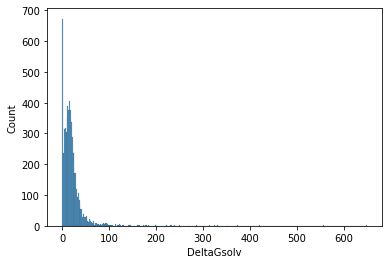

In [ ]:
sns.histplot(df["DeltaGsolv"]**2)
plt.show()

Or we can try to plot the mean and variance of the solvation energies for every solvent and see the differences accross those.

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Solvent', y='DeltaGsolv', data=df.sample(100))
plt.xticks(rotation = 90)
plt.show()

Or we can combine both and make violin plots, which are histograms made independently for each class and stacked together horizontally.

In [ ]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Solvent', y='DeltaGsolv', data=df.sample(50))
plt.xticks(rotation = 90)
plt.show()

**Exercise Question:** Plot a histogram of the squares of the solvation free energy values.

## 7. Advanced Data Processing for Chemistry

Hack to setup RDKit in Colab. Not needed when running on local machines.

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c rdkit rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import rdkit.Chem
import rdkit.Chem.Draw

### Visualizing the Molecules

In [ ]:
df["Solvent"].values[:16]

In [ ]:
molecules = [rdkit.Chem.MolFromSmiles(df["SolventSMILES"][i]) for i in range(16)]
rdkit.Chem.Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300,120), legends=[df["Solvent"][i] for i in range(16)])

### Filtering based on functional groups

In [ ]:
def has_carboxyl(molecule):
    mol = rdkit.Chem.MolFromSmiles(molecule)
    functional_group = rdkit.Chem.MolFromSmarts('C=O')
    matches = mol.GetSubstructMatches(functional_group)
    return len(matches) != 0

featurized_df = df.copy()
featurized_df["soluteHasCarboxyl"] = featurized_df["SoluteSMILES"].apply(has_carboxyl)
featurized_df["solventHasCarboxyl"] = featurized_df["SolventSMILES"].apply(has_carboxyl)

In [ ]:
carboxyl_data = featurized_df.groupby(["soluteHasCarboxyl", "solventHasCarboxyl"]).mean()
carboxyl_data

In [ ]:
sns.heatmap(
    carboxyl_data.values.reshape(2, 2), 
    yticklabels=["solute does not", "solute has carboxyl"], 
    xticklabels=["solvent does not", "solvent has carboxyl"]
)
plt.show()

**Exercise Question:** Make a 4x4 heatmap for the max value of solvation free energy when the solute and solvent each have carboxyl, alcohol, both, or neither.

## 8. Further Reading

* To learn about Pandas in detail, do the exercises and tutorials over at: https://www.kaggle.com/learn/pandas
* To learn about Seaborn in detail, do the exercises and tutorials over at: https://www.kaggle.com/learn/data-visualization
